# Mushroom Classification: Data Preprocessing

### **Problem Statement**: <br>
The Audubon Society Field Guide to North American Mushrooms contains descriptions
of hypothetical samples corresponding to 23 species of gilled mushrooms in the
Agaricus and Lepiota Family Mushroom (1981). Each species is labelled as either
definitely edible, definitely poisonous, or maybe edible but not recommended. This last
category was merged with the toxic category. The Guide asserts unequivocally that
there is no simple rule for judging a mushroom's edibility, such as "leaflets three, leave it
be" for Poisonous Oak and Ivy.
The main goal is to predict which mushroom is poisonous & which is edible.

Dataset obtained from Kaggle<br>
[DatasetLink](https://www.kaggle.com/datasets/uciml/mushroom-classification)

There are 2 classes: edible and poisonous<br>
There are 22 attributes

### **Attribute Information:**

- cap-shape: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s

- cap-surface: fibrous=f, grooves=g, scaly=y, smooth=s

- cap-color: brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y

- bruises: bruises=t, no=f

- odor: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s

- gill-attachment: attached=a, descending=d, free=f, notched=n

- gill-spacing: close=c, crowded=w, distant=d

- gill-size: broad=b, narrow=n

- gill-color: black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y

- stalk-shape: enlarging=e, tapering=t

- stalk-root: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=?

- stalk-surface-above-ring: fibrous=f, scaly=y, silky=k, smooth=s

- stalk-surface-below-ring: fibrous=f, scaly=y, silky=k, smooth=s

- stalk-color-above-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y

- stalk-color-below-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y

- veil-type: partial=p, universal=u

- veil-color: brown=n, orange=o, white=w, yellow=y

- ring-number: none=n, one=o, two=t

- ring-type: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z

- spore-print-color: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y

- population: abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y

## Importing Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import zipfile
import os
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from tabulate import tabulate

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Extracting zip file

In [ ]:
zip_path = '/content/drive/MyDrive/MushroomClassification/data/archive.zip'
extract_path = '/content/drive/MyDrive/MushroomClassification/data'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

## Data Description

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/MushroomClassification/data/mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
column_names = df.columns
column_names

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [ ]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


## Check for null values

In [ ]:
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

## Check for duplicated values

In [ ]:
df.duplicated().sum()

0

## Print unique values of each attribute

In [ ]:
def get_column_info(df):
    """
    Collect information about categorical columns in the DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame to analyze.

    Returns:
    list: A list of lists where each sublist contains:
        - Column name (str)
        - Number of unique values (int)
        - Comma-separated string of unique values (str)
    """
    column_info = []
    for column in df.columns:
        if df[column].dtype == 'object' or pd.api.types.is_categorical_dtype(df[column]):
            unique_values = df[column].unique()
            num_unique_values = df[column].nunique()
            unique_values_str = ", ".join(map(str, unique_values))
            column_info.append([column, num_unique_values, unique_values_str])
    return column_info

In [ ]:
column_info = get_column_info(df)

In [ ]:
print(tabulate(column_info, headers=["Attribute", "Number of Unique Values", "Unique Values"], tablefmt="pretty"))

+--------------------------+-------------------------+------------------------------------+
|        Attribute         | Number of Unique Values |           Unique Values            |
+--------------------------+-------------------------+------------------------------------+
|          class           |            2            |                p, e                |
|        cap-shape         |            6            |          x, b, s, f, k, c          |
|       cap-surface        |            4            |             s, y, f, g             |
|        cap-color         |           10            |    n, y, w, g, e, p, b, u, c, r    |
|         bruises          |            2            |                t, f                |
|           odor           |            9            |     p, a, l, n, f, c, y, s, m      |
|     gill-attachment      |            2            |                f, a                |
|       gill-spacing       |            2            |                c, w      

## Dropping insignificant columns

Since the attribute "veil-type" has only one unique value it will not contribute in the prediction hence we can drop it

In [ ]:
df = df.drop('veil-type', axis = True)

## Label Encoding

In [ ]:
label_encoder = LabelEncoder()

In [ ]:
column_names = df.columns

In [ ]:
for column in column_names:
  df[column] = label_encoder.fit_transform(df[column].values)

In [ ]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


## Data Visualization

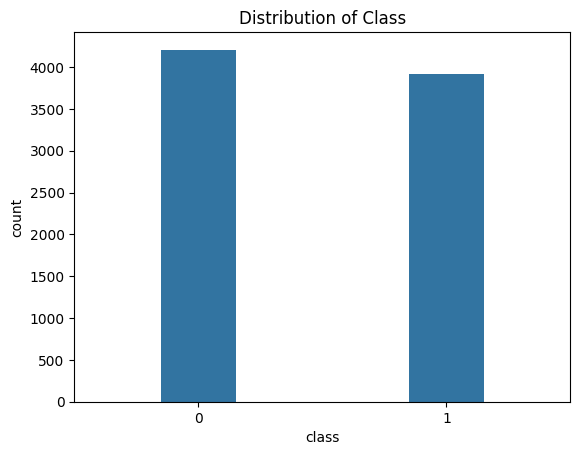

In [ ]:
# Bar plot for the 'class' column
sns.countplot(x='class', data=df, width = 0.3)
plt.title('Distribution of Class')
plt.show()

As we can see from the above graph, the class distribution is balanced. This means that the number of samples in each class is roughly equal, which is advantageous for training machine learning models. A balanced class distribution ensures that the model does not become biased towards any particular class, leading to more reliable and fair predictions. It also simplifies the evaluation process, as metrics like accuracy, precision, and recall will not be skewed by an imbalance in the data.

In [ ]:
# Sunburst Chart
dimensions = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'gill-size', 'gill-color']

fig = px.sunburst(df, path=dimensions)
fig.update_layout(title='Sunburst Chart')
fig.show()

The Sunburst chart provides a comprehensive visual representation of mushroom attributes, revealing key insights into their distribution and characteristics. Within the chart, we observe a balanced representation of edible and poisonous mushrooms, with distinct patterns emerging across various attributes. Additionally, the chart suggests potential indicators of mushroom edibility or toxicity based on attribute combinations.

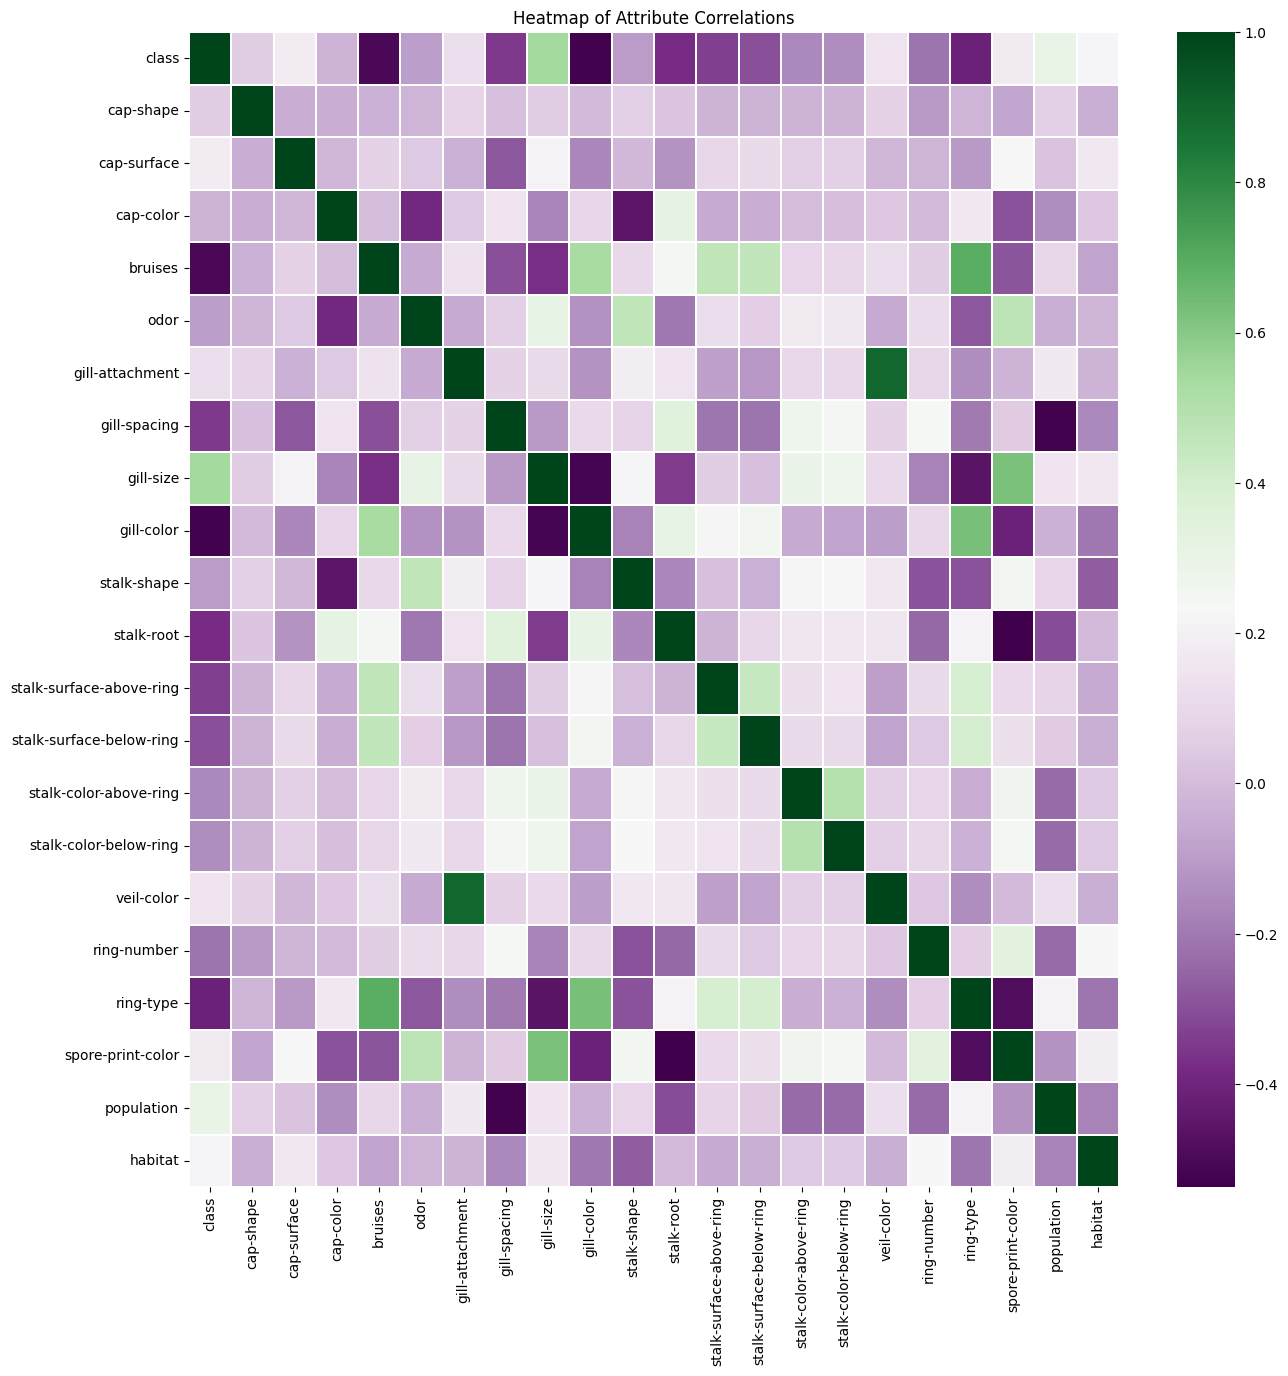

In [ ]:
# Heatmap of correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), cmap='PRGn', linewidths=0.1)
plt.title('Heatmap of Attribute Correlations')
plt.show()

Since veil-color and gill attachment are highly correlated we can drop any one of them

In [ ]:
df = df.drop('veil-color', axis = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int64
 1   cap-shape                 8124 non-null   int64
 2   cap-surface               8124 non-null   int64
 3   cap-color                 8124 non-null   int64
 4   bruises                   8124 non-null   int64
 5   odor                      8124 non-null   int64
 6   gill-attachment           8124 non-null   int64
 7   gill-spacing              8124 non-null   int64
 8   gill-size                 8124 non-null   int64
 9   gill-color                8124 non-null   int64
 10  stalk-shape               8124 non-null   int64
 11  stalk-root                8124 non-null   int64
 12  stalk-surface-above-ring  8124 non-null   int64
 13  stalk-surface-below-ring  8124 non-null   int64
 14  stalk-color-above-ring    8124 non-null 

## Applying PCA - Dimensionality Reduction

In [ ]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [ ]:
# Columns for each group
cap_columns = ['cap-shape', 'cap-surface', 'cap-color']
gill_columns = ['gill-attachment', 'gill-spacing', 'gill-size', 'gill-color']
stalk_columns = ['stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring']

In [ ]:
scaler = StandardScaler()

df[cap_columns] = scaler.fit_transform(df[cap_columns])
df[gill_columns] = scaler.fit_transform(df[gill_columns])
df[stalk_columns] = scaler.fit_transform(df[stalk_columns])

In [ ]:
pca = PCA(n_components=1)

df['cap'] = pca.fit_transform(df[cap_columns])
df['gill'] = pca.fit_transform(df[gill_columns])
df['stalk'] = pca.fit_transform(df[stalk_columns])

In [ ]:
df = df.drop(columns=cap_columns + gill_columns + stalk_columns)

In [ ]:
df.head()

,class,bruises,odor,ring-number,ring-type,spore-print-color,population,habitat,cap,gill,stalk
0,1,1,6,1,4,2,3,5,-0.796486,-1.283493,-1.198063
1,0,1,0,1,4,3,2,1,0.074534,0.163226,-1.020548
2,0,1,3,1,4,3,2,3,2.250543,0.352884,-1.020548
3,1,1,6,1,4,2,3,5,0.294295,-1.093835,-1.198063
4,0,0,5,1,0,3,0,1,-0.970691,0.724370,-1.737094


## Train - Test Split

In [ ]:
X = df.drop('class', axis = True)
y = df['class']

In [ ]:
X

,bruises,odor,ring-number,ring-type,spore-print-color,population,habitat,cap,gill,stalk
0,1,6,1,4,2,3,5,-0.796486,-1.283493,-1.198063
1,1,0,1,4,3,2,1,0.074534,0.163226,-1.020548
2,1,3,1,4,3,2,3,2.250543,0.352884,-1.020548
3,1,6,1,4,2,3,5,0.294295,-1.093835,-1.198063
4,0,5,1,0,3,0,1,-0.970691,0.724370,-1.737094
...,...,...,...,...,...,...,...,...,...,...
8119,0,5,1,4,0,1,2,0.143598,3.027982,0.505195
8120,0,5,1,4,0,4,2,-0.796486,3.027982,0.505195
8121,0,5,1,4,0,1,2,0.613641,1.890032,0.505195
8122,0,8,1,0,7,4,2,0.537564,-2.042127,-0.673454


In [ ]:
y

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Saving the dataframes to csv file

In [ ]:
df.to_csv('/content/drive/MyDrive/MushroomClassification/data/cleanedData/cleanedDataframe.csv')
X_train.to_csv('/content/drive/MyDrive/MushroomClassification/data/cleanedData/X_train.csv')
y_train.to_csv('/content/drive/MyDrive/MushroomClassification/data/cleanedData/y_train.csv')
X_test.to_csv('/content/drive/MyDrive/MushroomClassification/data/cleanedData/X_test.csv')
y_test.to_csv('/content/drive/MyDrive/MushroomClassification/data/cleanedData/y_test.csv')